# Imports + Helper Function

In [1]:
from funcs import get_parc_sizes
from plot_funcs import (get_results, conv_to_df,
                        plot_ranks, plot_rank_comparison, plot_raw_scores)
import matplotlib.pyplot as plt

In [2]:
def plot_avg_ranks(across=False, raw=False, avg_only=True, plot_min_max=False, **kwargs):
    
    parc_sizes = get_parc_sizes('../parcels', **kwargs)
    df = conv_to_df(results, only=parc_sizes)
    
    if across:
        plot_rank_comparison(parc_sizes, df)
    else:
        if raw:
            plot_raw_scores(parc_sizes, df, avg_only=avg_only)
        else:
            plot_ranks(parc_sizes, df, avg_only=avg_only, plot_min_max=plot_min_max)
    
# Load results
results = get_results('../Exp/results')

Found: 22477 Incomplete: 91.80000000000018



### There is a strong relationship between number of parcels and performance.

We can show that this exists across a number of criteria. First, we will look at averaged performance across each of the model pipelines to get a feel for the overall behavior across models. We will look at a few different scales, which not only helps show different parts of the graph better, but computes the rankings on that subset as well.

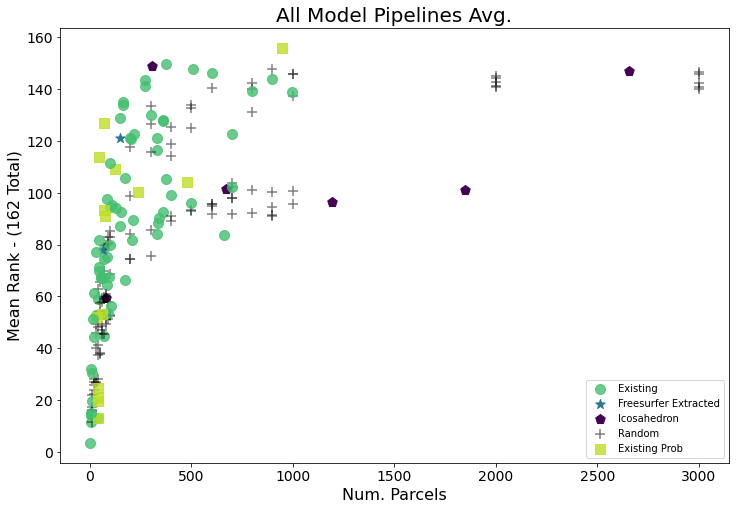

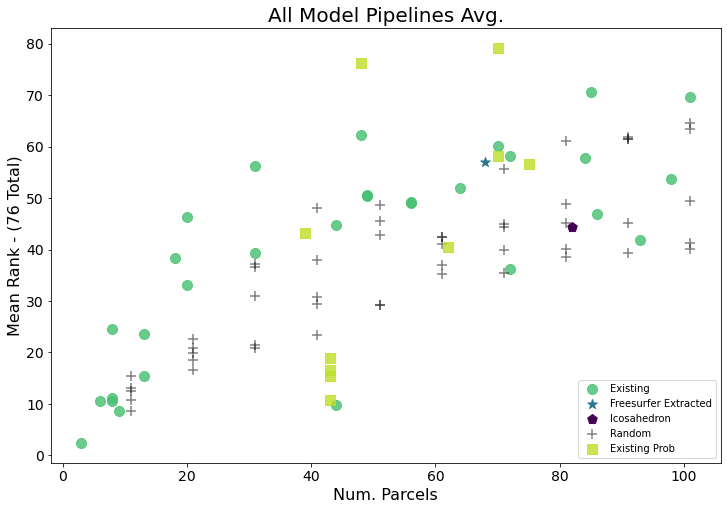

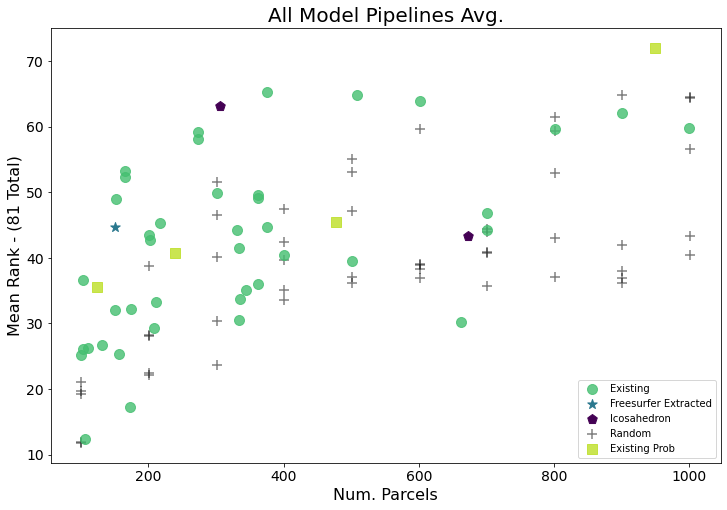

In [3]:
plot_avg_ranks(random=True, base=True, prob=True, fs=True, ico=True)

plot_avg_ranks(random=True, base=True, prob=True, fs=True, ico=True, size_max=101)

plot_avg_ranks(random=True, base=True, prob=True,
               fs=True, ico=True, size_min=100, size_max=1001)

Takeaways:
- The benefit of more parcels is most drastic at the start, as we see a sharp rise up to ~500, then a more gradual increase in utility as number of parcels grows.
- Existing parcellations at lower numbers of parcels do on average better than their random parcel counterparts. It is unclear if this trend would continue, as we were only able to source existing parcellations up to size 1000. That said, it is seems like it may not.
- The random parcellations follow more strictly the trend of more parcels == better performance than their existing counterparts.
- The FreeSurfer extracted parcellations, despite employing different modalities and major discrepencies in how they were derived, follow quite closely expected perforance based on number of parcels. That said, the Destr. parcellation while not ideal, still achieves a mean rank of ~115 out of 197, compared to the Desikan parcellation which is closer to ~ 75. 
- Probabilitic parcellations may do better than static ones, though the evidence here is slim, especially as far fewer probabilitic parcellations were considered. It may be worth looking into more in future work though.
- The tested Icosohedron parcellations seem to, which the exception of the smallest one considered, perform quite well for their number of parcels (relative to other's tested at nearby numbers).

Caveat: These are trends as averaged over all three considered Model Pipeline's - as we will show next, it may be hiding important information to average over all pipelines.

We next consider the same plot as before, but broken down by each Model Pipeline individually. 

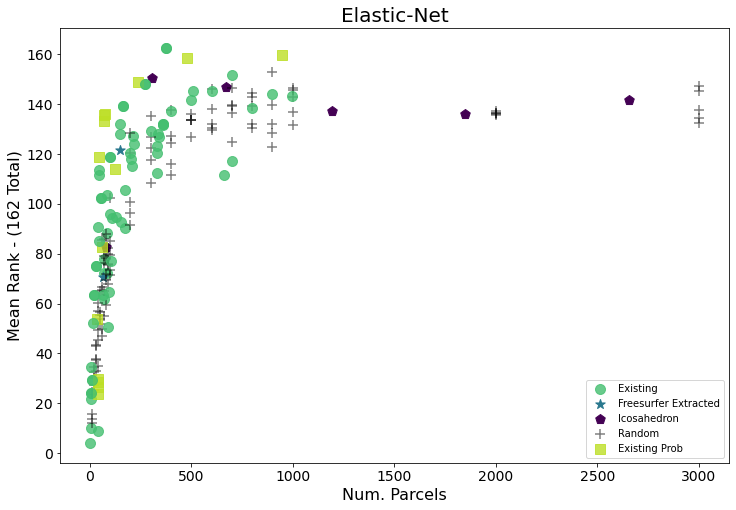

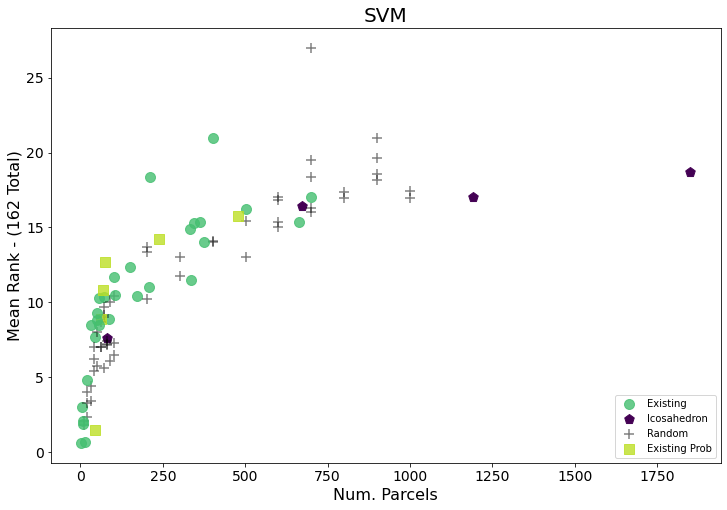

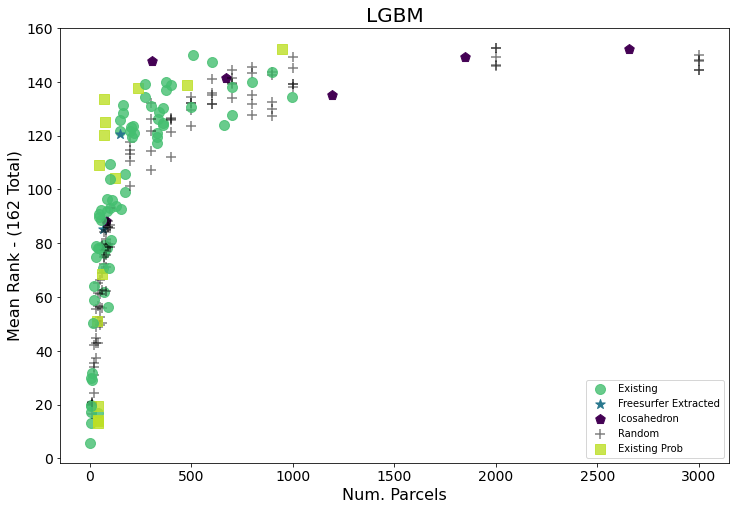

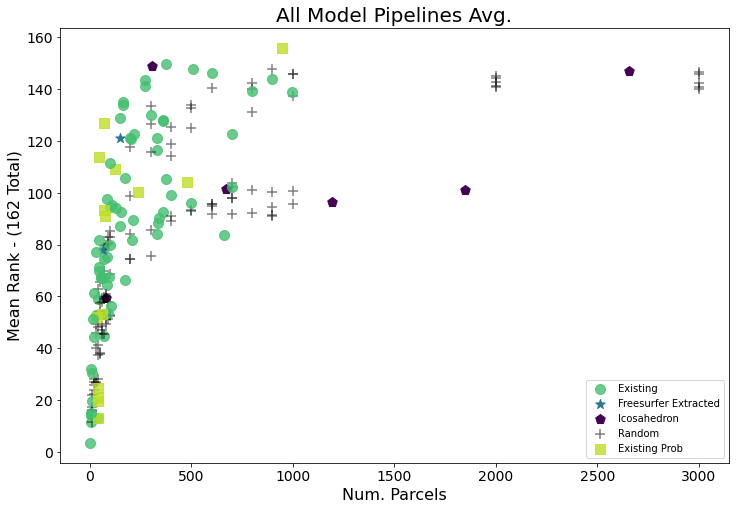

In [4]:
plot_avg_ranks(avg_only=False, random=True, base=True, prob=True, fs=True, ico=True)

Takeaways:
- The general pattern (more parcels, better performance) mostly holds across each pipeline individually, though not neccisarily at the same rates.
- The exception in part appears to be the Elastic-Net based result, which while the early scaling holds, the performance seems to plateau earlier than compared to the other Pipelines. This can be seen most easily by looking at just the random parcellation performance, in this case we see that random parcels of size 800 have roughly the same mean rank as random parcels of size 3000, and even random parcels of size 500 have only a slightly lower mean rank. Likewise, the best performing parcellations for the Elastic-Net based results are fairly consistently a group of high parcel existing parcellations.
- SVM?

While this tells us the behavior is stable across different pipelines, we show in the next step that the performance between the different pipelines is not neccisarily equal. To do this, we show mean ranking when ranks are now computed and compared between each Model Pipeline's results seperately. For example, where before the results for say the LGBM based pipeline, the mean rank for each parcellation was computed as that parcellation's mean rank on all of the target's relative to only the LGBM pipeline's performance on all targets. Therefore it's rank was computed only relative to other LGBM derrived results. In the below plot, this is not the case, instead the ranking is computed for each target across all combinations of parcellations and Model Pipelines. Note that the maximum rank is now 3 times higher.

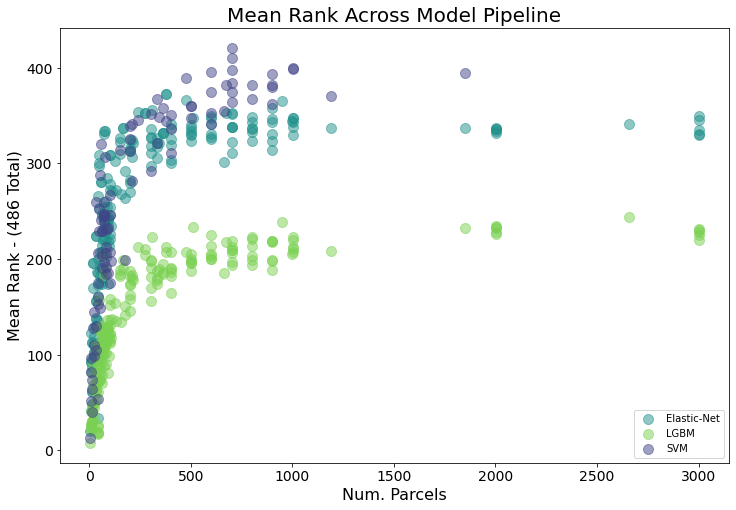

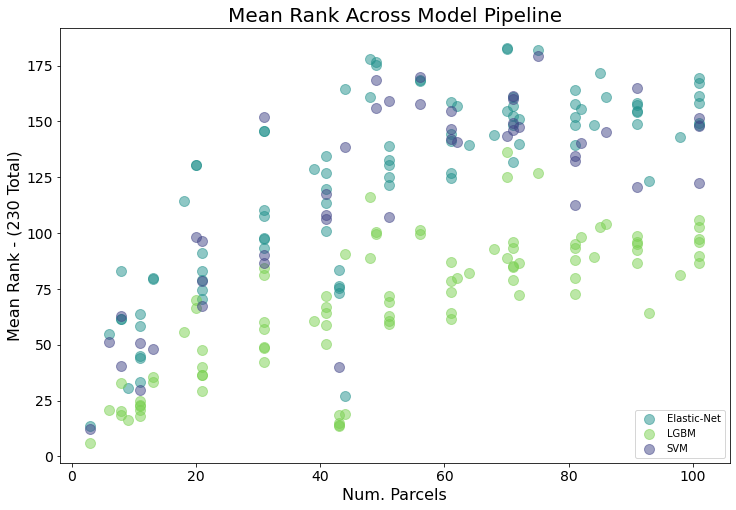

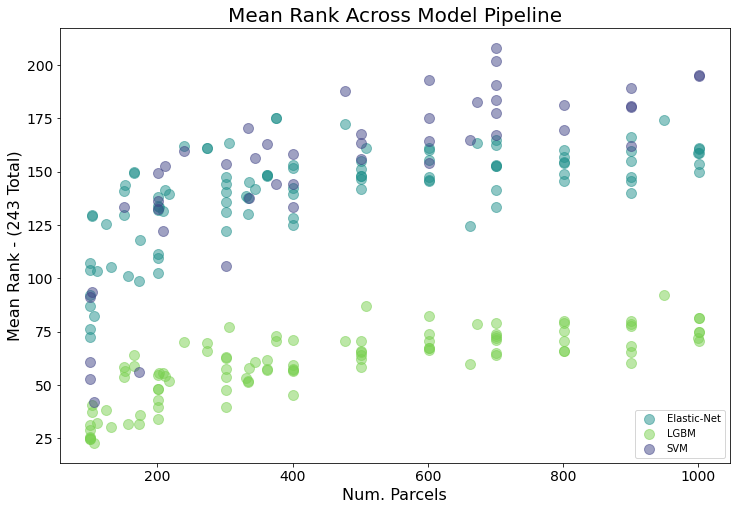

In [5]:
plot_avg_ranks(across=True, random=True, base=True,
               prob=True, fs=True, ico=True)

plot_avg_ranks(across=True, random=True, base=True,
               prob=True, fs=True, ico=True, size_max=101)

plot_avg_ranks(across=True, random=True, base=True,
               prob=True, fs=True, ico=True, size_min=100, size_max=1001)

Takeaways:
- The different Model Pipeline's performance are not equivilent, instead we see that the SVM based model shows the highest performance, matched equally with the Elastic-Net based results until about size 400. After size 400 we see that the SVM based results start to out-perform the Elastic-Net.
- The LGBM based model is by far the least competative of the tested pipelines. While it shows it's own internal scaling, even at the highest number of parcellations tested, it performs on average far worse than either the Elastic-Net or SVM based models. There are plenty of reasons why this might be the case, e.g., maybe the sMRI surface data employed is not well exploited by tree-based models, or maybe the hyper-parameter scheme employed is sub-optimal. In general, different machine learning algorithms will work better on some datasets for some problems, and worse on others.
- Given the SVM's dominant performance, the strong scaling we observed in the last set of figures is especially interesting. This gives even more weight / evidence to support the underlying story around the relationship between parcellation and performance. 
- At low numbers of parcel's, choice of model doesn't seem to matter as much (i.e., even though the LGBM does worse on average <100 parcels, the discrepancy is far less than at higher parcel numbers)

How stable are these rankings across different problem types? I.e., even though some obtain a relatively high mean ranking, are there still cases where a small number of parcels are better for predicting some phenotype?



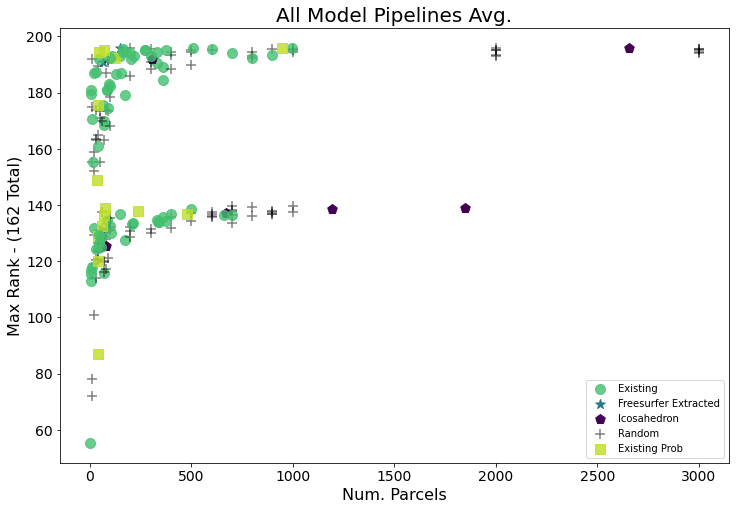

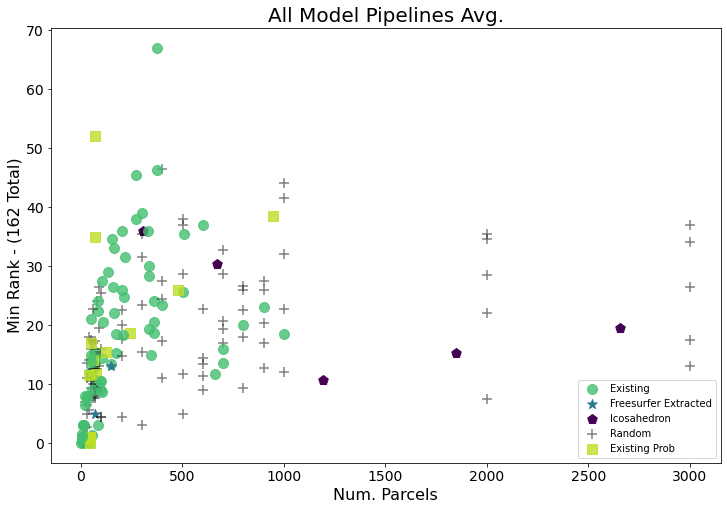

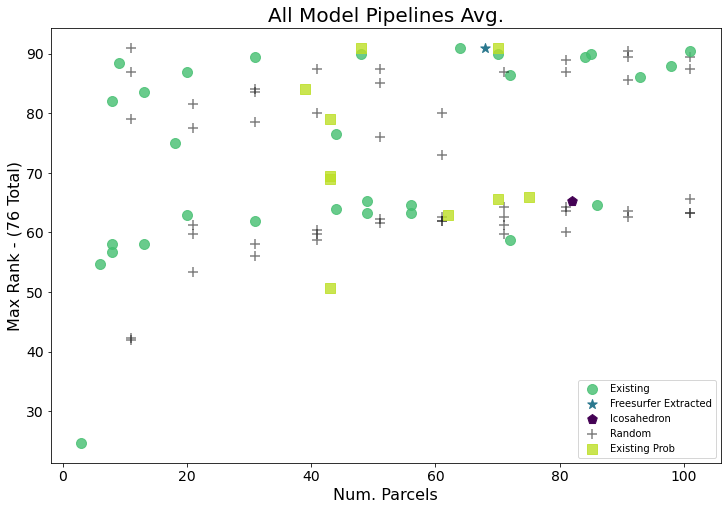

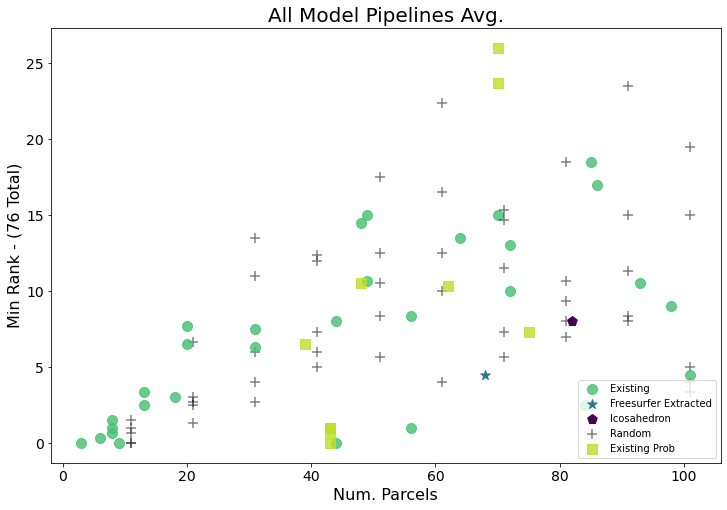

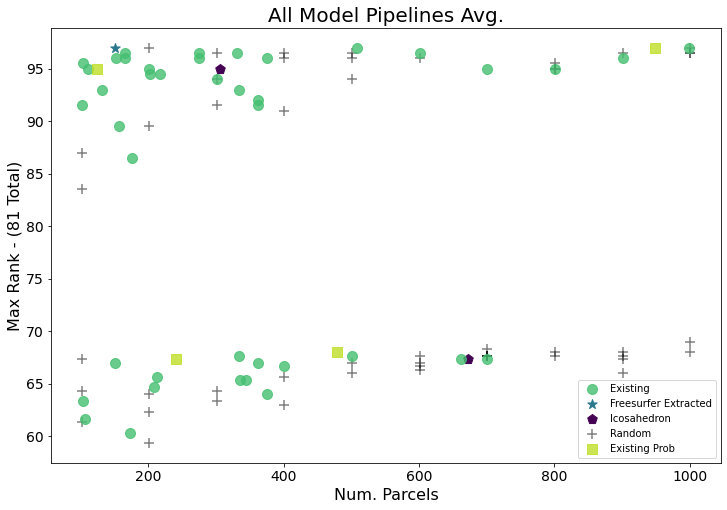

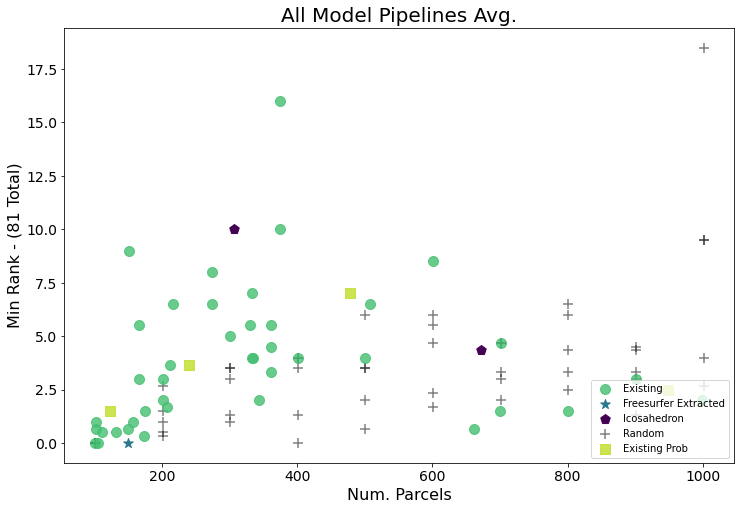

In [6]:
plot_avg_ranks(plot_min_max=True, random=True, base=True, prob=True, fs=True, ico=True)

plot_avg_ranks(plot_min_max=True, random=True, base=True, prob=True, fs=True, ico=True, size_max=101)

plot_avg_ranks(plot_min_max=True, random=True, base=True, prob=True,
               fs=True, ico=True, size_min=100, size_max=1001)

Takeways:
- First let's consider just the max rank plots, what this shows us is that there are indeed a number of cases where parcellations with a low number of parcels obtain the highest(or atleast close to) rank for a specific predictive problem. There is a limit though, we see that there is an upward trend where parcellations up to about size 100 don't always get a problem where they are the highest rank.
- Next, we can examine the plots that show minimum rank, this an interesting metric as it describes a parcellations worst case performance. One very interesting pattern here is that there are a collection of parcellations roughly around size 500 of mostly Existing, but Isohedron and some random too, which achieved the highest minimum rank (60-70 in the full plot). Especially when compared to the parcellations of size 1000-3000 which performed quite well on the mean rank, but worse here (30-50).
- These plots help support the narrative that while there is no one best parcellation that will work the best on all problem types, parcellations of around 500 may be most resistant to drops in performance. On the other hand, high performing 1000+ parcellations can on average do the best, but are more suspectible to larger dips in performance for predicting some phenotypes.  


We also may want to ask, what does all of this look like in terms of absolute average scores vs. in rank space? How big is the difference actually in performance?

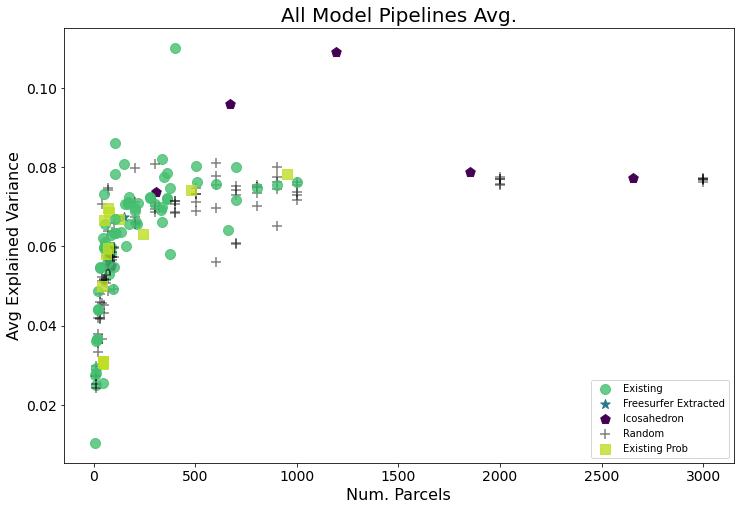

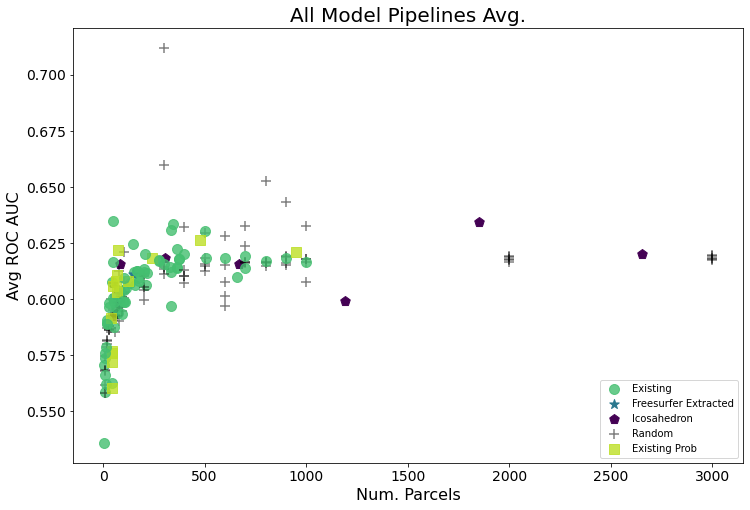

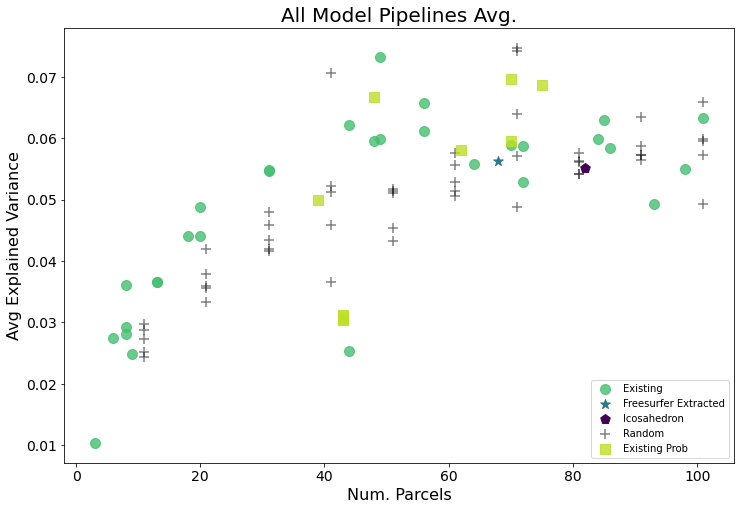

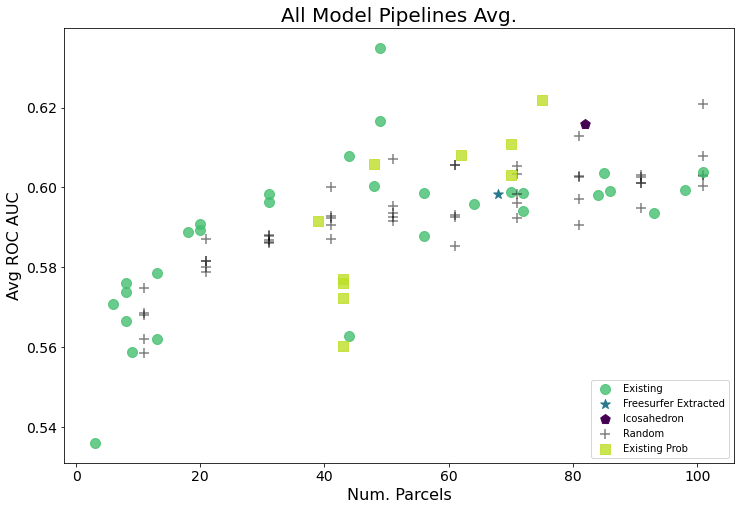

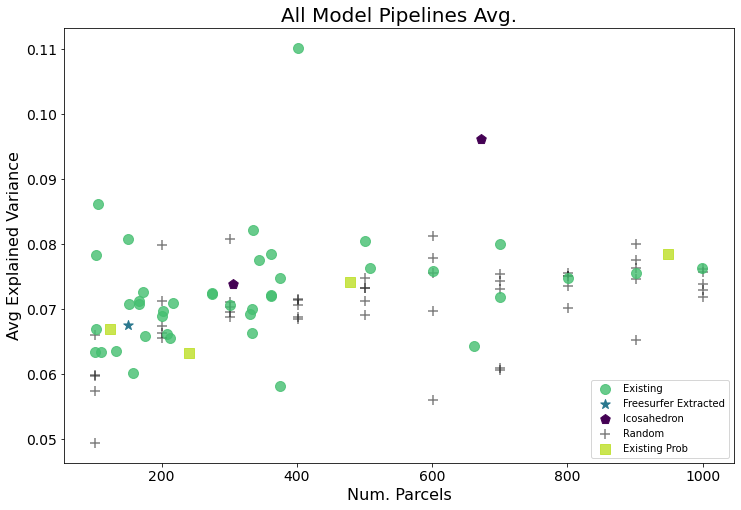

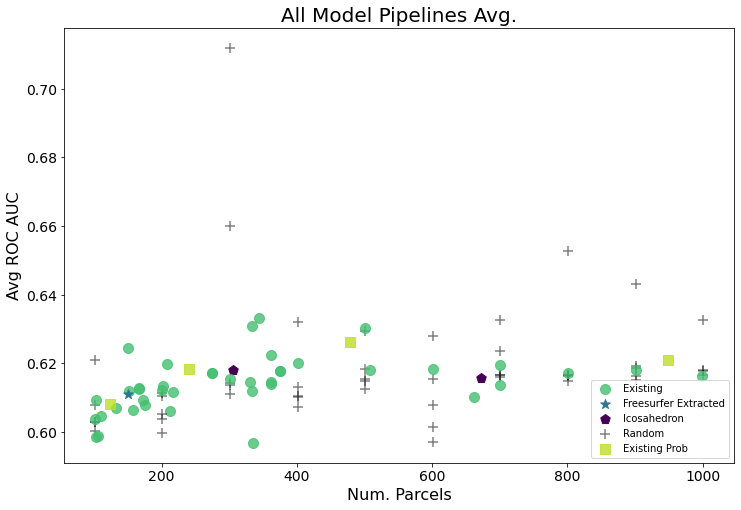

In [7]:
plot_avg_ranks(raw=True, random=True, base=True,
               prob=True, fs=True, ico=True)

plot_avg_ranks(raw=True, random=True, base=True,
               prob=True, fs=True, ico=True, size_max=101)

plot_avg_ranks(raw=True, random=True, base=True,
               prob=True, fs=True, ico=True, size_min=100, size_max=1001)

Takeways:
- The score is still a bit hard to interpret, as it is averaged across so many different predictive tasks, but regardless, the same patterns as observed in the rank space appear to hold. Also note that these are the scores as averaged across all pipelines, so they include the poorer scores from the LGBM pipelines. 
- It's hard to compare binary and regression results as they are expressed with different metrics and plotted between different ranges, regardless atleast visually they tend to look simmilar. 
- Interesting to make the Freesurfer extracted comparison again, where Destr. ~.067 R2, ~.613 ROC AUC and Desikan .055 R2, .598 ROC AUC, relative to highs of a bit over .08 R2 and .625 ROC AUC

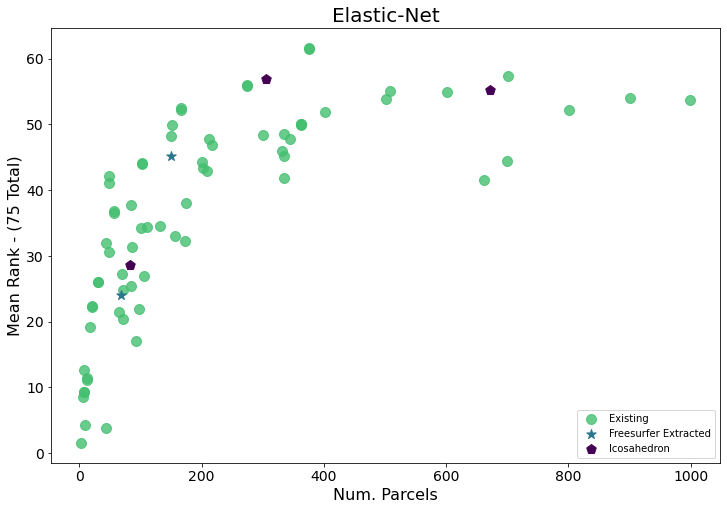

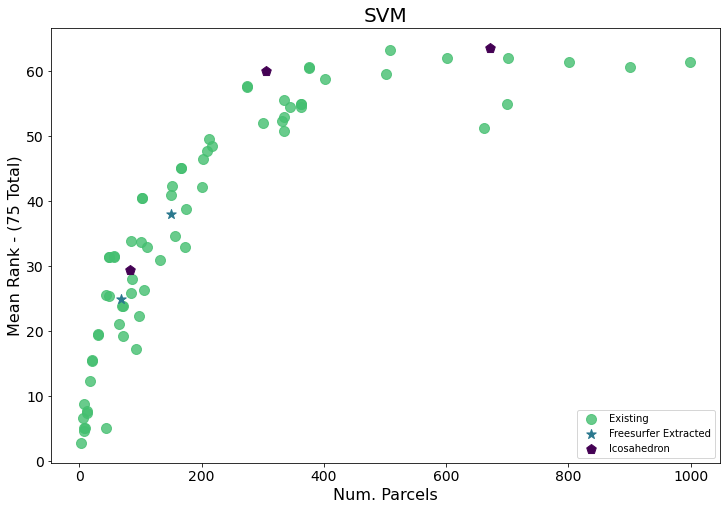

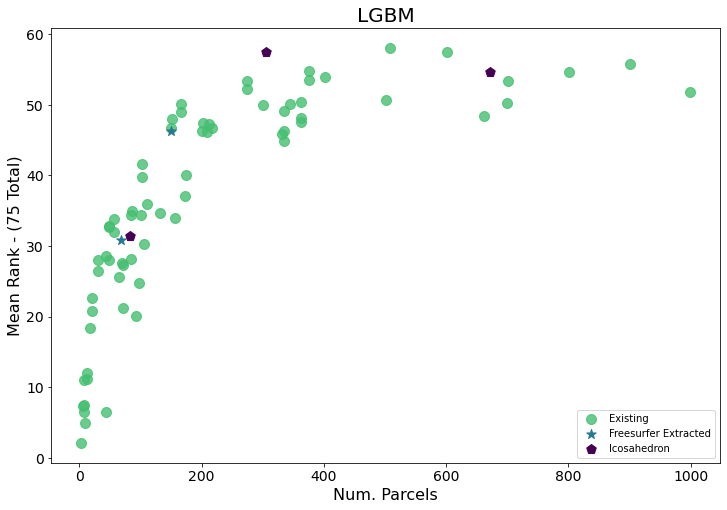

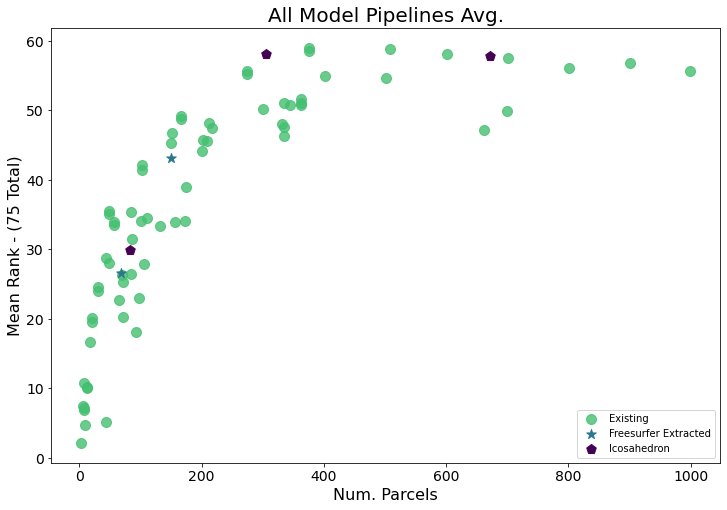

In [3]:
plot_avg_ranks(avg_only=False, base=True, fs=True, ico=True, size_max=1001)

## Base with prob. atlases too

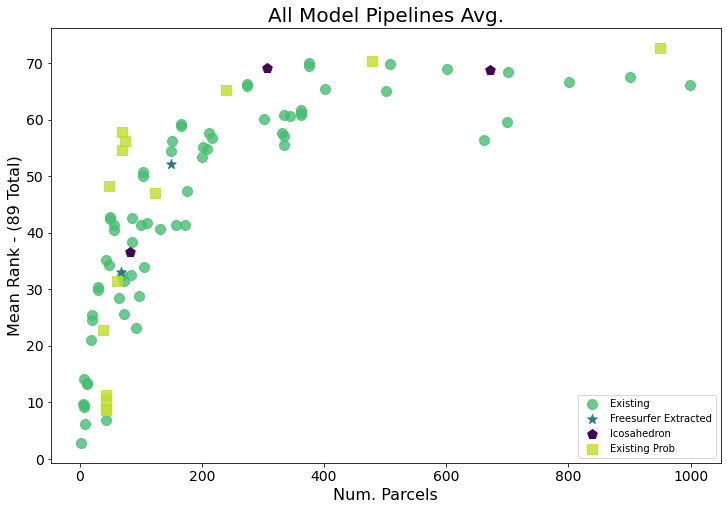

In [4]:
plot_avg_ranks(base=True, prob=True, fs=True, ico=True, size_max=1001)

## Random up to 100

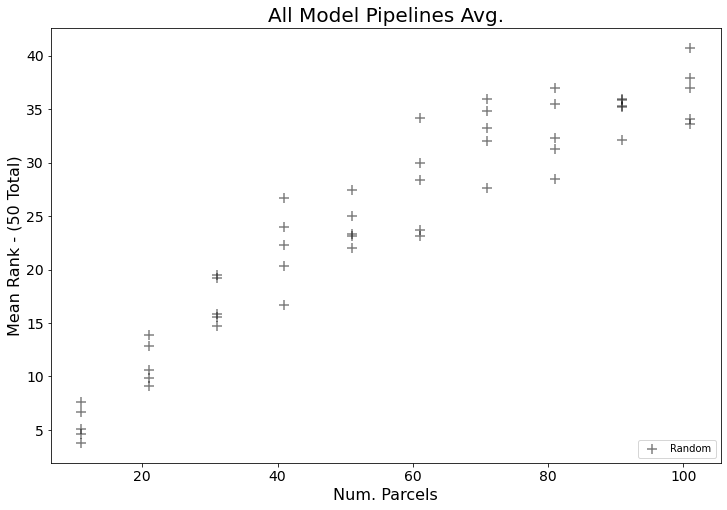

In [5]:
plot_avg_ranks(random=True, size_max=101)

## Random Vs. Existing up to 100

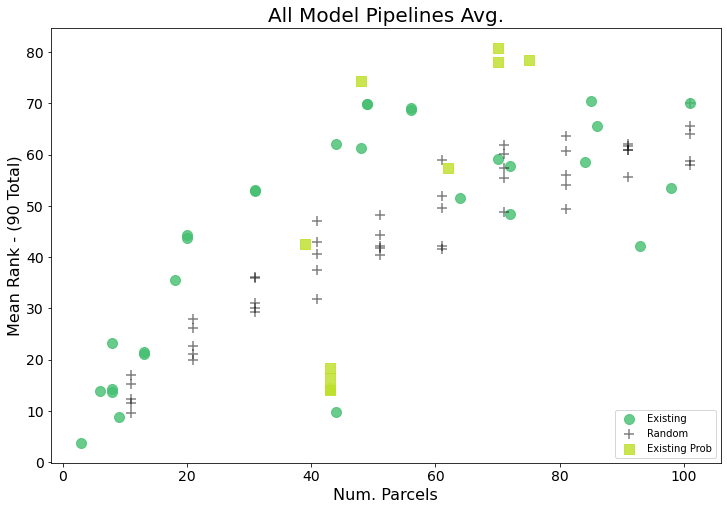

In [6]:
plot_avg_ranks(random=True, base=True, prob=True, size_max=101)

## Random Vs. Existing up to 100, extra

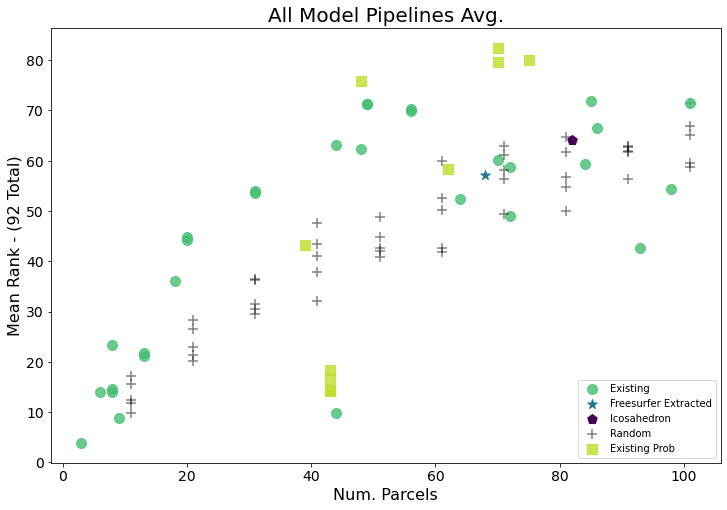

In [7]:
plot_avg_ranks(random=True, base=True, prob=True, fs=True, ico=True, size_max=101)

## Random 100-1000

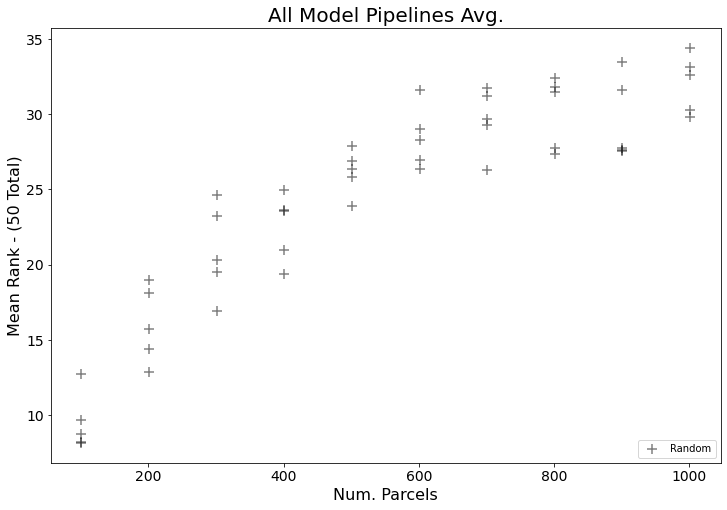

In [8]:
plot_avg_ranks(random=True, size_min=100, size_max=1001)

## Random vs. Existing 100-1000

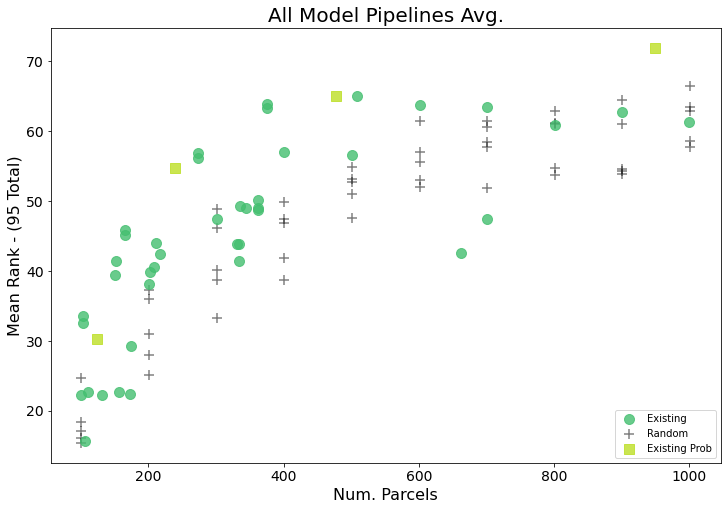

In [9]:
plot_avg_ranks(random=True, base=True, prob=True,
               size_min=100, size_max=1001)

## Random vs. Existing 100-1000, extra

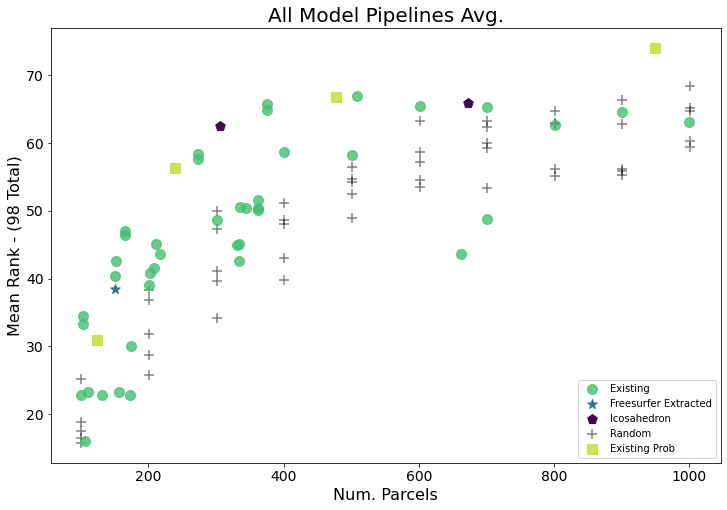

In [10]:
plot_avg_ranks(random=True, base=True, prob=True,
               fs=True, ico=True, size_min=100, size_max=1001)

## Random > 100

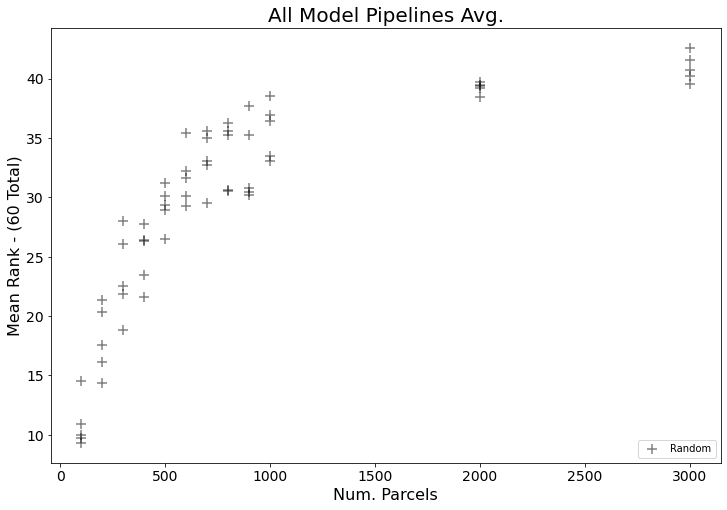

In [11]:
plot_avg_ranks(random=True, size_min=100)

## Random vs existing > 100

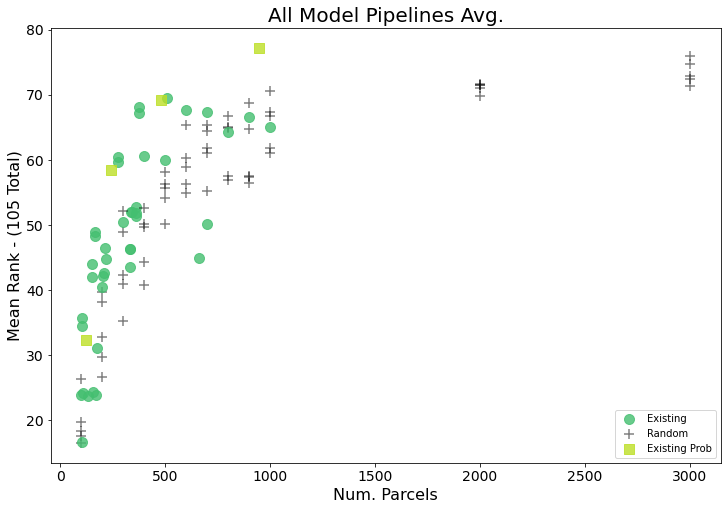

In [12]:
plot_avg_ranks(random=True, base=True, prob=True, size_min=100)

## Random vs existing > 100, extra

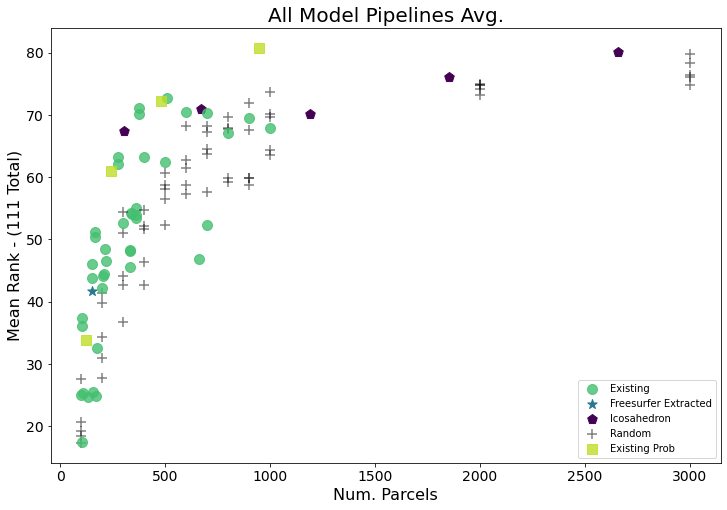

In [13]:
plot_avg_ranks(random=True, base=True, prob=True, fs=True, ico=True, size_min=100)

## All Base (everything but ensembles)

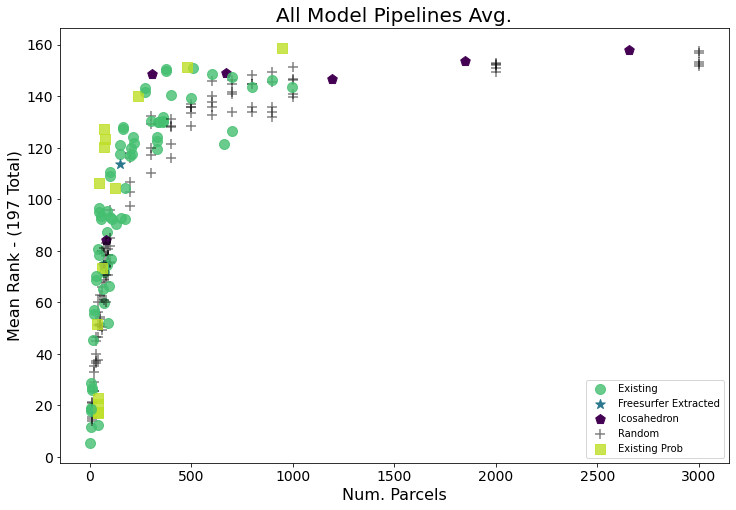

In [14]:
plot_avg_ranks(random=True, base=True, prob=True, fs=True, ico=True)

## All Base (everything but ensembles) - by model seperately

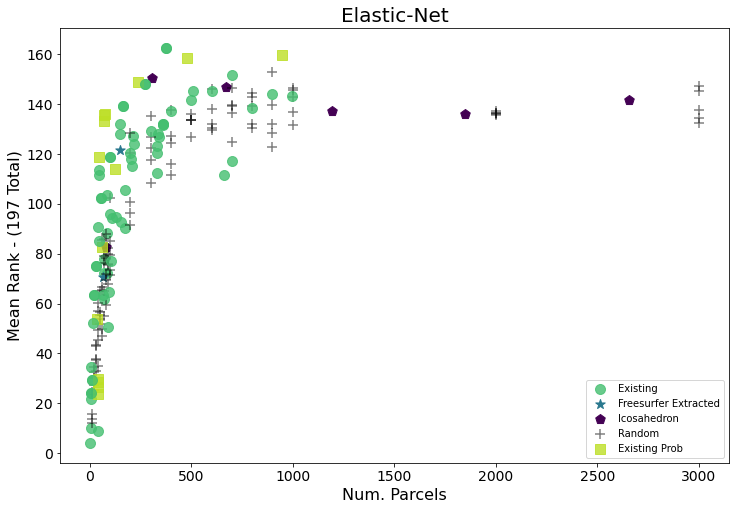

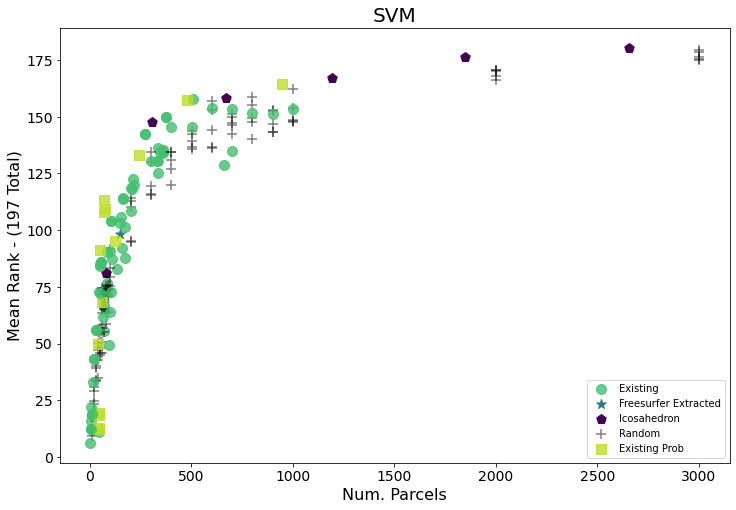

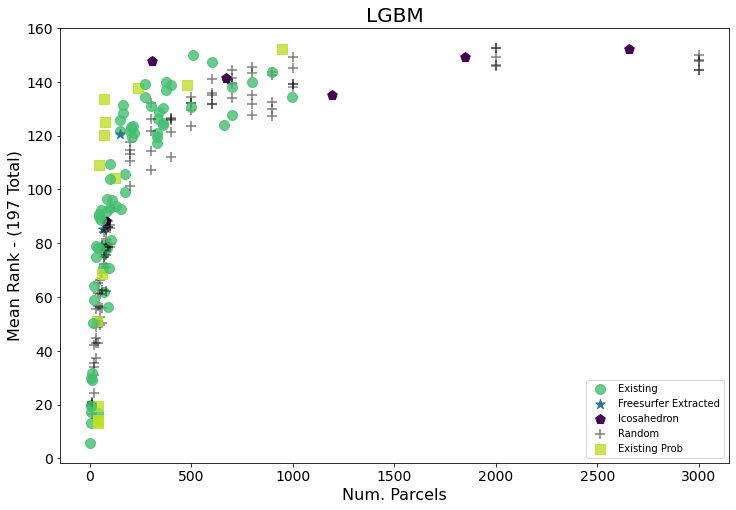

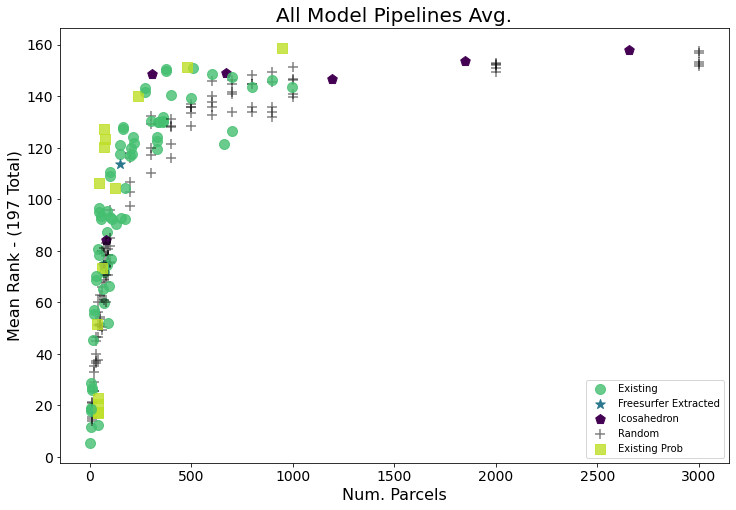

In [15]:
plot_avg_ranks(avg_only=False, random=True, base=True, prob=True, fs=True, ico=True)

# Average Ranks Pipeline Comparison

## All Base (everything but ensembles)

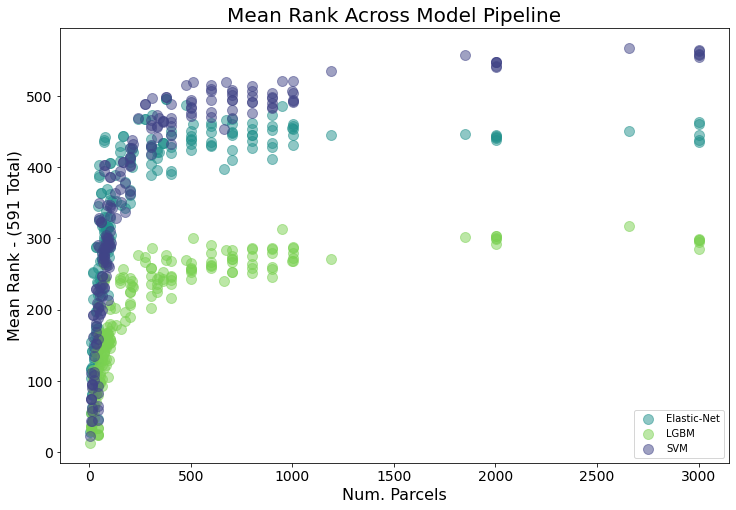

In [16]:
plot_avg_ranks(across=True, random=True, base=True,
               prob=True, fs=True, ico=True)

## > 100

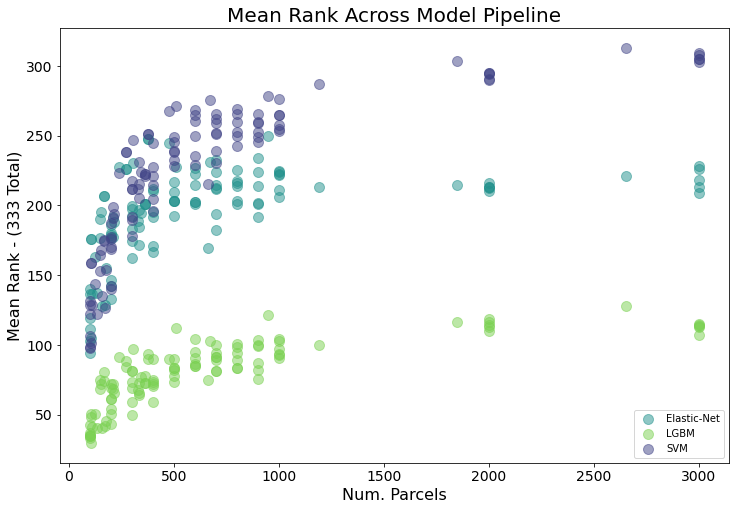

In [24]:
plot_avg_ranks(across=True, random=True, base=True,
               prob=True, fs=True, ico=True, size_min=100)

## < 100 

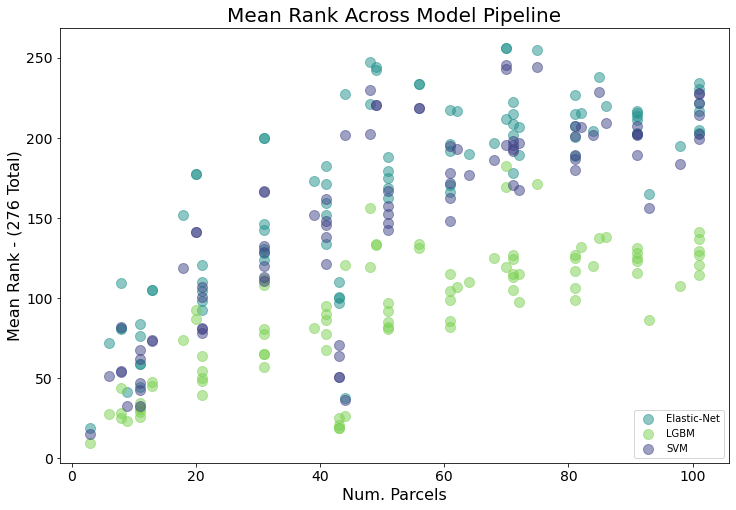

In [25]:
plot_avg_ranks(across=True, random=True, base=True,
               prob=True, fs=True, ico=True, size_max=101)

## Just Existing

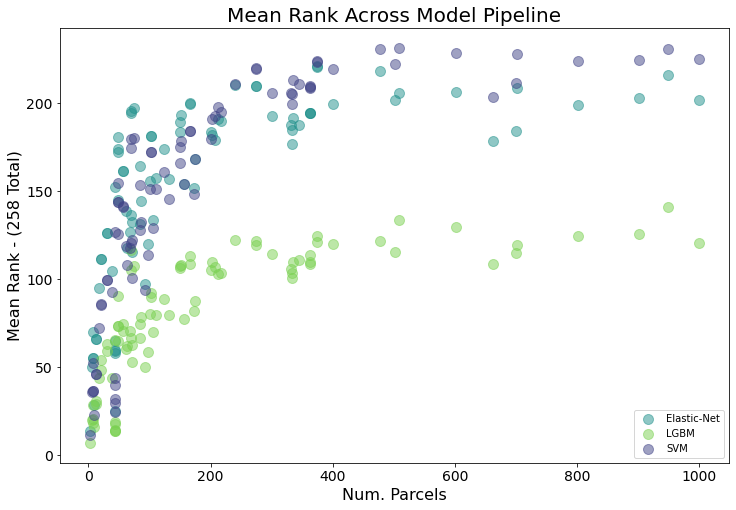

In [29]:
plot_avg_ranks(across=True, base=True, prob=True, fs=True)

# Ensemble Methods

## Just Extra Methods

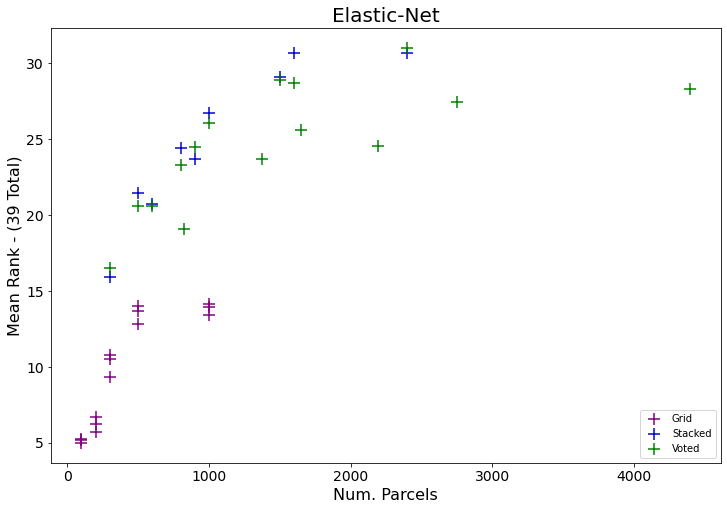

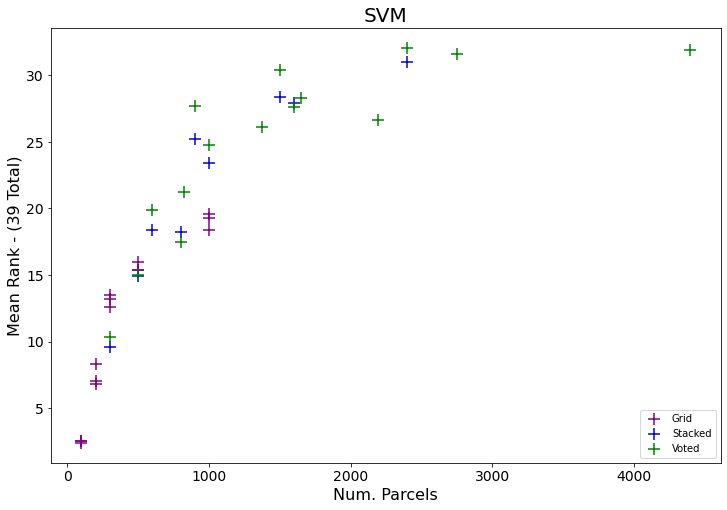

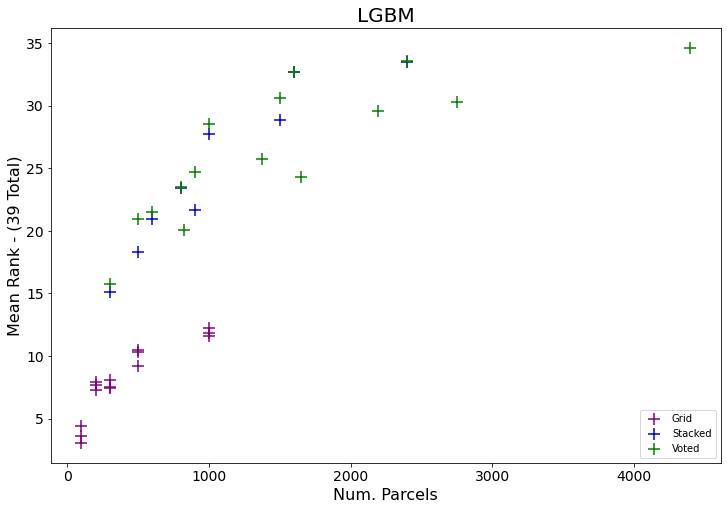

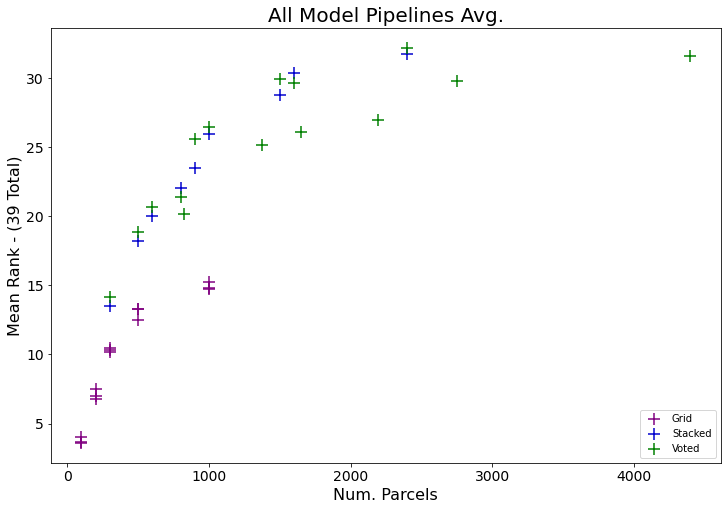

In [17]:
plot_avg_ranks(avg_only=False, stacked=True, voted=True, grid=True)

## Everything > 100

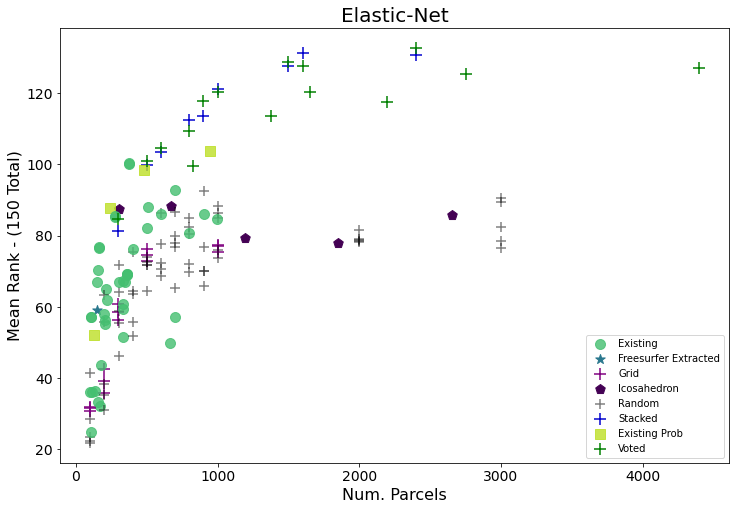

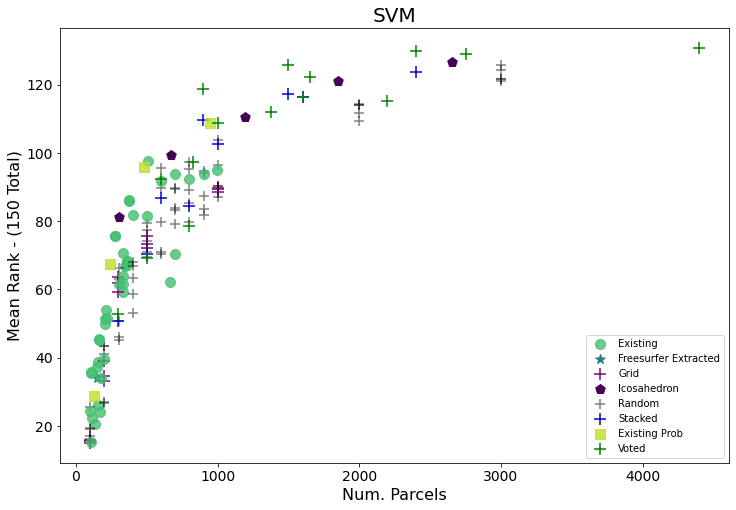

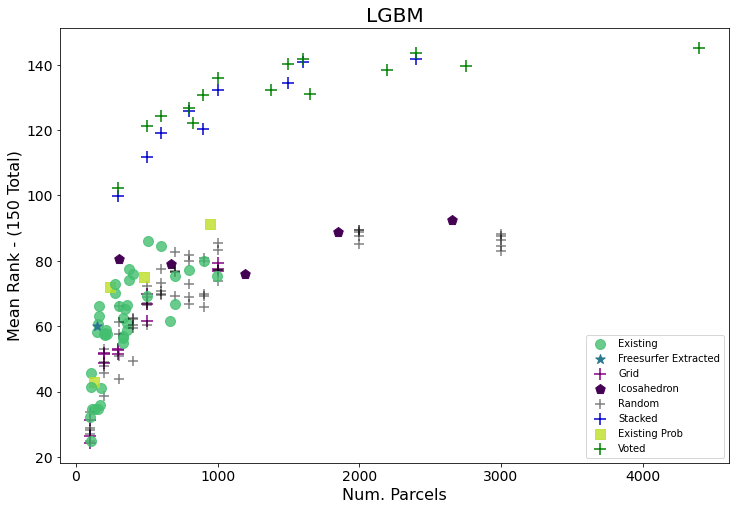

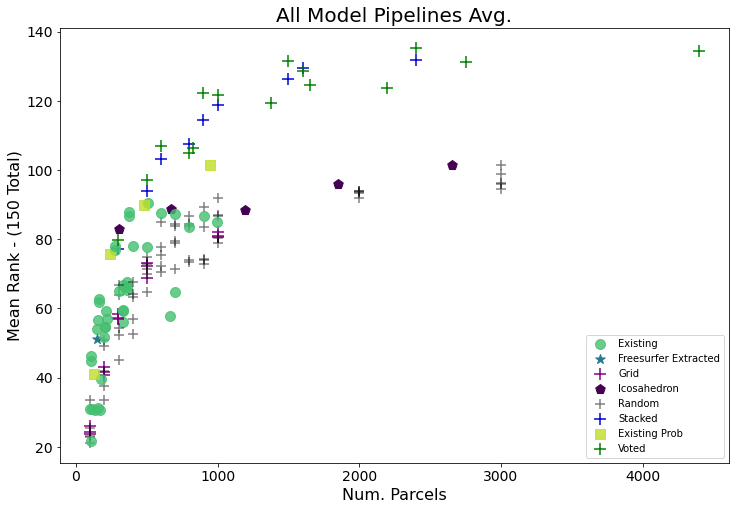

In [21]:
plot_avg_ranks(avg_only=False, everything=True, size_min=100)

## Grid Vs Random > 100 - 1000

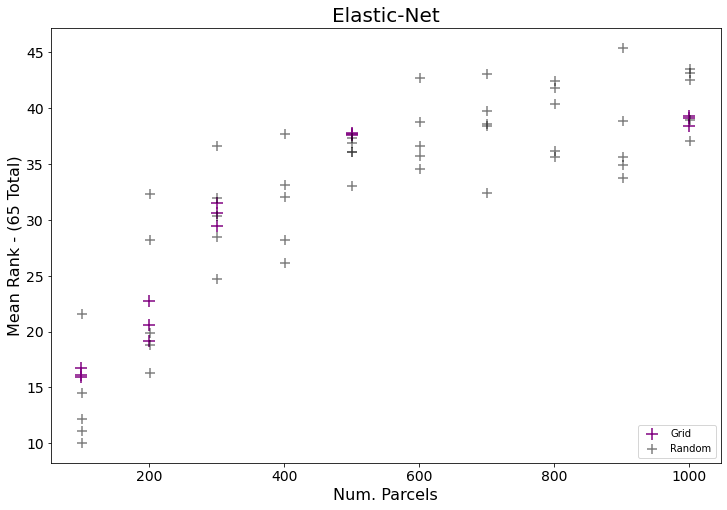

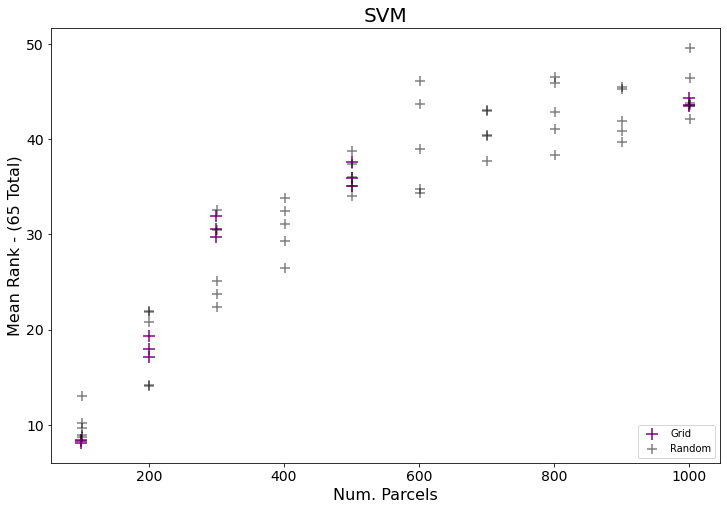

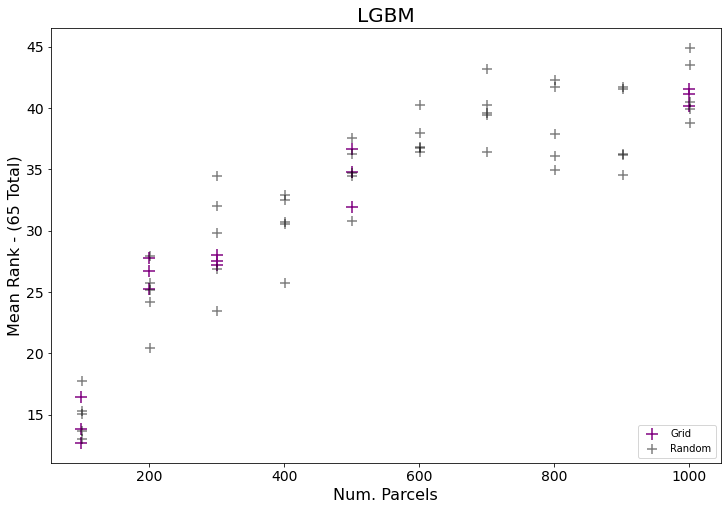

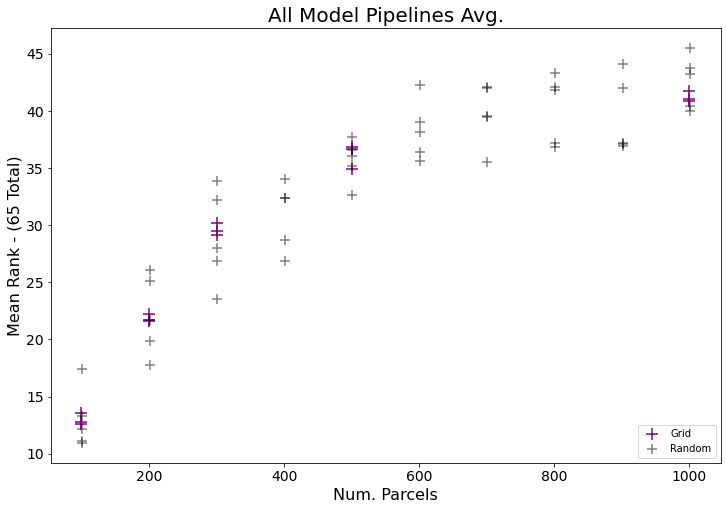

In [23]:
plot_avg_ranks(avg_only=False, grid=True, random=True, size_min=100, size_max=1001)

## Breakdown by Model for Extra runs

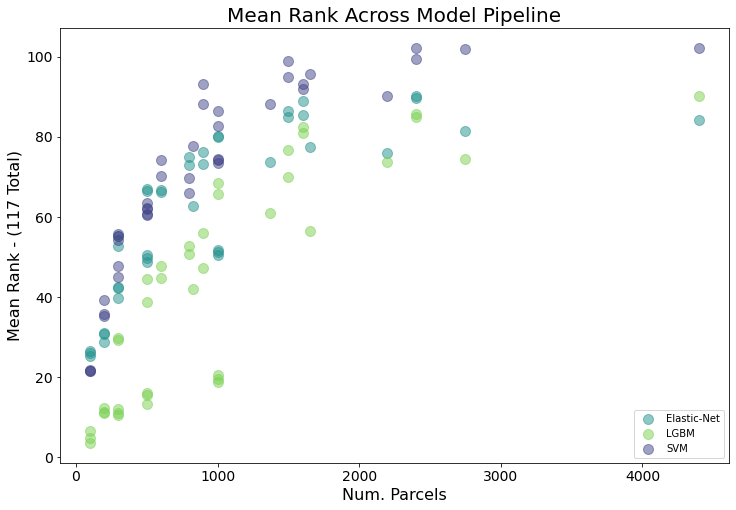

In [19]:
plot_avg_ranks(across=True, stacked=True, voted=True, grid=True, size_min=100)